In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as sm

In [2]:
df = pd.read_csv('data/electric_demand/energy_dataset.csv')

In [3]:
df = df[['time','total load actual']]

temp_s = pd.to_datetime(df['time'])
temp_s = temp_s.apply(lambda x: x.strftime('%Y-%m'))

df['time'] = temp_s

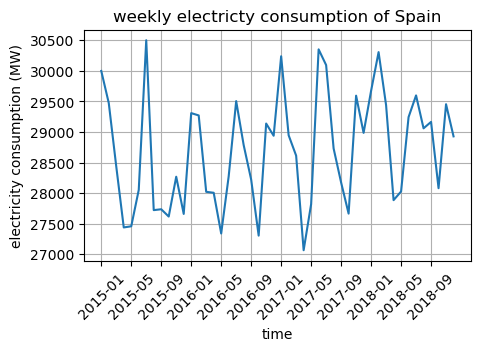

In [18]:
temp_df = df.groupby('time').agg('mean').reset_index()

plt.figure(figsize=(5,3))
plt.plot(temp_df.time, temp_df['total load actual'])
plt.xticks(np.arange(len(temp_df['time']))[::4],temp_df['time'][::4])
plt.tick_params(axis='x', labelrotation=45)
plt.xlabel('time')
plt.ylabel('electricity consumption (MW)')
plt.title('weekly electricty consumption of Spain')
plt.grid()
plt.show()

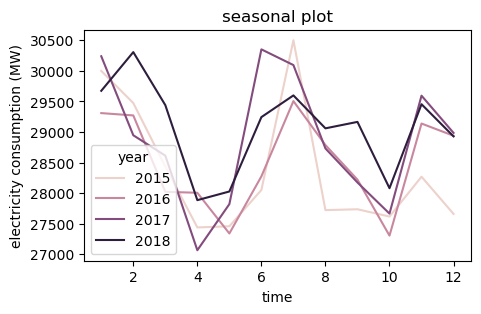

In [8]:
plt.figure(figsize=(5,3))
temp_df['month'] = temp_df['time'].apply(lambda x: pd.to_datetime(x).date().month)
temp_df['year'] = temp_df['time'].apply(lambda x: pd.to_datetime(x).date().year)
sns.lineplot(data=temp_df, x='month', y='total load actual', hue='year', legend='full')
plt.title('seasonal plot')
plt.xlabel('time')
plt.ylabel('electricity consumption (MW)')
plt.show()

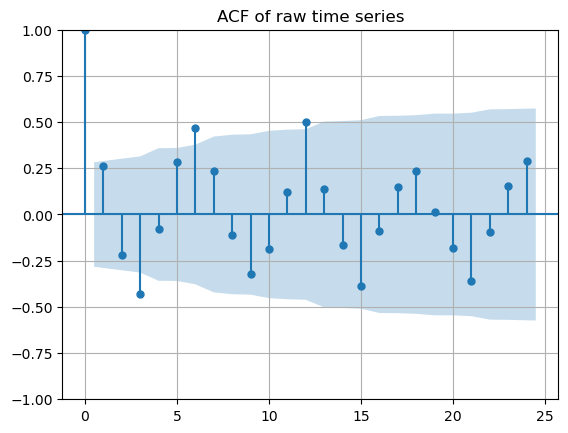

In [16]:
# acf
import statsmodels as sm
sm.graphics.tsaplots.plot_acf(temp_df['total load actual'].values, lags=24)
plt.grid()
plt.title('ACF of raw time series')
plt.show()

forecasting efforts below

In [3]:
df = df[['time','total load actual']]

In [7]:
temp_s = pd.to_datetime(df['time'])
temp_s = temp_s.apply(lambda x: x.strftime('%Y-%m-%d'))
df['time'] = temp_s

temp_df = df.groupby('time').agg('mean').reset_index()

In [14]:
train_df = temp_df.iloc[:1000]
valid_df = temp_df.iloc[1000:1100]
test_df = temp_df.iloc[1100:]

In [41]:
# define performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

def rmse(y_true, y_pred):
    return mean_squared_error(y_true,y_pred,squared=False)

def mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

def mape(y_true, y_pred):
    return mean_absolute_percentage_error(y_true, y_pred)

valid | MAE: 2436.8517151515152, RMSE: 2943.165277541188, MAPE: 0.08845408968389173
test  | MAE: 5371.053258059336, RMSE: 5974.388953113705, MAPE: 0.17772123319700173


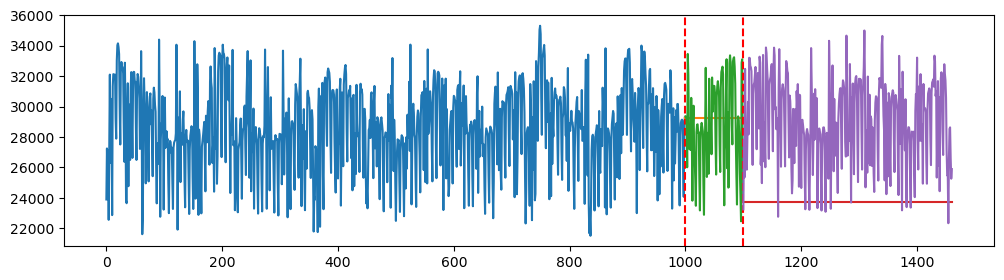

In [44]:
#  naive method

y_pred_valid = np.repeat(train_df.iloc[-1,-1],len(valid_df))
y_true_valid = valid_df['total load actual'].values

y_pred_test = np.repeat(valid_df.iloc[-1,-1],len(test_df))
y_true_test = test_df['total load actual'].values

print(f'valid | MAE: {mae(y_true_valid, y_pred_valid)}, RMSE: {rmse(y_true_valid, y_pred_valid)}, MAPE: {mape(y_true_valid, y_pred_valid)}')
print(f'test  | MAE: {mae(y_true_test, y_pred_test)}, RMSE: {rmse(y_true_test, y_pred_test)}, MAPE: {mape(y_true_test, y_pred_test)}')

plt.figure(figsize=(12,3))
# plot train data
plt.plot(train_df.index,train_df['total load actual'].values)
plt.axvline(x=train_df.index[-1], ls='--', color='r')
# plot valid data and pred
plt.plot(valid_df.index,y_pred_valid)
plt.plot(valid_df.index,y_true_valid)
plt.axvline(x=valid_df.index[-1], ls='--', color='r')
# plot test data and pred
plt.plot(test_df.index,y_pred_test)
plt.plot(test_df.index,y_true_test)
plt.show()

valid | MAE: 2349.865048484849, RMSE: 2890.5656164959664, MAPE: 0.08334053760427329
test  | MAE: 2280.417115030127, RMSE: 2744.9352038877482, MAPE: 0.07908470147512207


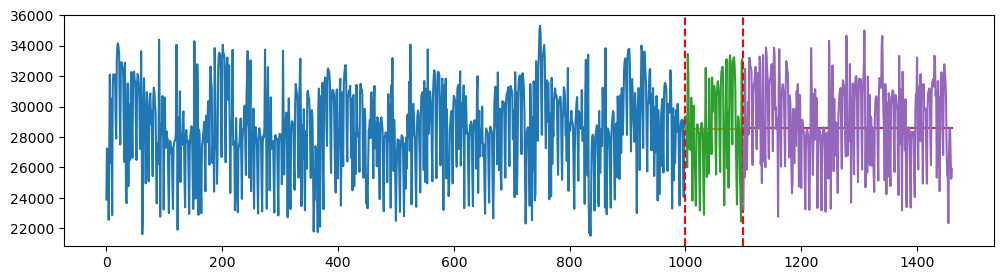

In [49]:
#  mean method

y_pred_valid = np.repeat(np.mean(train_df['total load actual']),len(valid_df))
y_true_valid = valid_df['total load actual'].values

y_pred_test = np.repeat(np.mean(pd.concat([train_df, valid_df])['total load actual']),len(test_df))
y_true_test = test_df['total load actual'].values

print(f'valid | MAE: {mae(y_true_valid, y_pred_valid)}, RMSE: {rmse(y_true_valid, y_pred_valid)}, MAPE: {mape(y_true_valid, y_pred_valid)}')
print(f'test  | MAE: {mae(y_true_test, y_pred_test)}, RMSE: {rmse(y_true_test, y_pred_test)}, MAPE: {mape(y_true_test, y_pred_test)}')

plt.figure(figsize=(12,3))
# plot train data
plt.plot(train_df.index,train_df['total load actual'].values)
plt.axvline(x=train_df.index[-1], ls='--', color='r')
# plot valid data and pred
plt.plot(valid_df.index,y_pred_valid)
plt.plot(valid_df.index,y_true_valid)
plt.axvline(x=valid_df.index[-1], ls='--', color='r')
# plot test data and pred
plt.plot(test_df.index,y_pred_test)
plt.plot(test_df.index,y_true_test)
plt.show()